In [222]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from river.datasets import CreditCard
from IncrementalTorch.datasets import Covertype, Shuttle

warnings.filterwarnings('ignore')

## Settings

In [223]:
# Specify the model you want to filter by
target_models = ['AE', 'DAE', 'PW-AE', "HST", "xStream", "Kit-Net"]

# Specify the seed setting names
seed_settings = ['original', 'old_seeds', 'new_seeds']

# Select the list of metrics to plot
## All metrics
# metrics = ['PR-AUC', 'ROC-AUC', 'Max F1', 'Max F1 Precision', 'Max F1 Recall', 'runtime']
## Metrics used by the original paper
metrics = ['PR-AUC', 'ROC-AUC', 'runtime']

# Data columns
## All metrics
# columns = ['PR-AUC', 'ROC-AUC', 'Max F1', 'Max F1 Precision', 'Max F1 Recall', 'runtime', 'status', 'model', 'subsample', 'preprocessor', 'postprocessor', 'seed', 'lr', 'latent_dim', 'dataset']
## Metrics used by the original paper
columns = ['dataset', 'model', 'PR-AUC', 'ROC-AUC', 'runtime']

# https://github.com/himanshudce/DAADS
# model sorted list similar to paper
sorter = ['ILOF','HST','RRCF','xStream','Kit-Net','AE','DAE','PW-AE']
# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter, range(len(sorter))))


In [224]:
def sort_dataframe(df):
    df['model_Rank'] = df['model'].map(sorterIndex)
    df.sort_values(['model_Rank'],ascending = [True], inplace = True)
    df.drop('model_Rank', 1, inplace = True)
    df.reset_index(inplace=True,drop=True)
    return df
    

In [225]:
def abs_dataframes(df1, df2):
    # Calculate the absolute difference between the two dataframes
    return (df1 - df2).abs().reset_index()

In [226]:
def flatten_dataframe(df1):
    # Pivot the dataframe
    pivot_df = df1.pivot(index='model', columns='dataset', values=['PR-AUC', 'ROC-AUC', 'runtime'])

    # Flatten the MultiIndex columns
    pivot_df.columns = [f'{col[0]}-{col[1]}' for col in pivot_df.columns]

    # Reset index to make 'model' a regular column
    pivot_df.reset_index(inplace=True)

    # Reorder columns for better visibility
    final_df = pivot_df[['model', 'PR-AUC-covertype', 'ROC-AUC-covertype', 'runtime-covertype',
                        'PR-AUC-shuttle', 'ROC-AUC-shuttle', 'runtime-shuttle',
                        'PR-AUC-creditcard', 'ROC-AUC-creditcard', 'runtime-creditcard']]

    # Define the custom order
    custom_order = ['ILOF', 'HST', 'RRCF', 'xStream', 'Kit-Net', 'AE', 'DAE', 'PW-AE']

    # Convert 'model' column to Categorical with custom order
    final_df['model'] = pd.Categorical(final_df['model'], categories=custom_order, ordered=True)

    # Sort the dataframe based on the 'model' column
    final_df.sort_values('model', inplace=True)

    # Reset index for better presentation
    final_df.reset_index(drop=True, inplace=True)
    final_df.set_index(['model'], inplace=True)

    return final_df

In [227]:
def round_dataframe(df):
    return df.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

## Arranging Tables Benchmark

In [228]:
# Loading the datasets
benchmark_csv_new_seeds = sort_dataframe(pd.read_csv('../results/new_seed/Benchmark_cython_combined.csv')[columns])
benchmark_csv_old_seeds = sort_dataframe(pd.read_csv('../results/old_seed/Benchmark_combined.csv')[columns])
benchmark_csv_original = sort_dataframe(pd.read_csv('../results/original/Benchmark.csv')[columns])

# Drop ILOF and RRCF from the original results as new results do not include them
benchmark_csv_original = benchmark_csv_original[~benchmark_csv_original['model'].isin(['ILOF', 'RRCF'])]

In [229]:
flattened_benchmark_csv_new_seeds = flatten_dataframe(benchmark_csv_new_seeds)
round_dataframe(flattened_benchmark_csv_new_seeds)

,PR-AUC-covertype,ROC-AUC-covertype,runtime-covertype,PR-AUC-shuttle,ROC-AUC-shuttle,runtime-shuttle,PR-AUC-creditcard,ROC-AUC-creditcard,runtime-creditcard
model,,,,,,,,,
HST,0.150,0.909,2736.029,0.773,0.973,459.509,0.166,0.925,2359.228
xStream,0.035,0.750,1358.164,0.123,0.727,232.927,0.004,0.688,1370.026
Kit-Net,0.205,0.905,80.228,0.259,0.803,15.837,0.141,0.943,550.267
AE,0.249,0.953,155.665,0.909,0.975,27.450,0.228,0.940,165.913
DAE,0.515,0.985,255.695,0.927,0.982,44.506,0.252,0.943,254.122
PW-AE,0.458,0.983,284.601,0.956,0.986,38.177,0.261,0.945,291.540


In [230]:
flattened_benchmark_csv_old_seeds = flatten_dataframe(benchmark_csv_old_seeds)
round_dataframe(flattened_benchmark_csv_old_seeds)

,PR-AUC-covertype,ROC-AUC-covertype,runtime-covertype,PR-AUC-shuttle,ROC-AUC-shuttle,runtime-shuttle,PR-AUC-creditcard,ROC-AUC-creditcard,runtime-creditcard
model,,,,,,,,,
HST,0.148,0.903,2500.154,0.796,0.975,446.093,0.185,0.930,2581.536
xStream,0.033,0.754,1401.767,0.118,0.724,216.084,0.005,0.711,1481.947
Kit-Net,0.205,0.905,99.943,0.259,0.803,15.659,0.141,0.943,631.962
AE,0.266,0.956,166.822,0.886,0.973,25.100,0.234,0.940,186.724
DAE,0.501,0.984,290.957,0.922,0.981,41.550,0.247,0.943,267.284
PW-AE,0.451,0.982,320.041,0.955,0.986,38.188,0.258,0.945,273.086


In [231]:
flattened_benchmark_csv_original = flatten_dataframe(benchmark_csv_original)
round_dataframe(flattened_benchmark_csv_original)

,PR-AUC-covertype,ROC-AUC-covertype,runtime-covertype,PR-AUC-shuttle,ROC-AUC-shuttle,runtime-shuttle,PR-AUC-creditcard,ROC-AUC-creditcard,runtime-creditcard
model,,,,,,,,,
HST,0.141,0.905,21.07,0.780,0.975,3.92,0.171,0.931,21.47
xStream,0.033,0.754,13.85,0.118,0.724,2.35,0.005,0.711,15.38
Kit-Net,0.205,0.905,0.95,0.259,0.803,0.17,0.141,0.943,6.02
AE,0.266,0.956,1.56,0.886,0.973,0.25,0.234,0.940,1.68
DAE,0.501,0.984,2.55,0.922,0.981,0.42,0.247,0.943,2.74
PW-AE,0.451,0.982,2.80,0.955,0.986,0.44,0.258,0.945,2.68


### Difference between replication and original

In [232]:
abs_original_new = abs_dataframes(flattened_benchmark_csv_original, flattened_benchmark_csv_new_seeds)
round_dataframe(abs_original_new)

,model,PR-AUC-covertype,ROC-AUC-covertype,runtime-covertype,PR-AUC-shuttle,ROC-AUC-shuttle,runtime-shuttle,PR-AUC-creditcard,ROC-AUC-creditcard,runtime-creditcard
0,HST,0.009,0.004,2714.959,0.007,0.002,455.589,0.005,0.006,2337.758
1,xStream,0.002,0.004,1344.314,0.005,0.003,230.577,0.001,0.023,1354.646
2,Kit-Net,0.000,0.000,79.278,0.000,0.000,15.667,0.000,0.000,544.247
3,AE,0.017,0.003,154.105,0.023,0.002,27.200,0.006,0.000,164.233
4,DAE,0.014,0.001,253.145,0.005,0.001,44.086,0.005,0.000,251.382
5,PW-AE,0.007,0.001,281.801,0.001,0.000,37.737,0.003,0.000,288.860


In [233]:
abs_original_old =  abs_dataframes(flattened_benchmark_csv_original, flattened_benchmark_csv_old_seeds)
round_dataframe(abs_original_old)

,model,PR-AUC-covertype,ROC-AUC-covertype,runtime-covertype,PR-AUC-shuttle,ROC-AUC-shuttle,runtime-shuttle,PR-AUC-creditcard,ROC-AUC-creditcard,runtime-creditcard
0,HST,0.007,0.002,2479.084,0.016,0.0,442.173,0.014,0.001,2560.066
1,xStream,0.000,0.000,1387.917,0.000,0.0,213.734,0.000,0.000,1466.567
2,Kit-Net,0.000,0.000,98.993,0.000,0.0,15.489,0.000,0.000,625.942
3,AE,0.000,0.000,165.262,0.000,0.0,24.850,0.000,0.000,185.044
4,DAE,0.000,0.000,288.407,0.000,0.0,41.130,0.000,0.000,264.544
5,PW-AE,0.000,0.000,317.241,0.000,0.0,37.748,0.000,0.000,270.406


## Testing the effect of seed choice

In [234]:
# Loading the datasets
benchmark_csv_raw_new_seeds = pd.read_csv('../results/new_seed/Benchmark_raw_cython_combined.csv')[columns]
# benchmark_csv_new_seeds = pd.read_csv('../results/new_seed/Benchmark_raw.csv')[columns]
benchmark_csv_raw_old_seeds = pd.read_csv('../results/old_seed/Benchmark_raw_combined.csv')[columns]
benchmark_csv_raw_original = pd.read_csv('../results/original/Benchmark_raw.csv')[columns]

# Add an 'origin' column depending on the dataset origin
benchmark_csv_raw_original['origin'] = seed_settings[0]
benchmark_csv_raw_old_seeds['origin'] = seed_settings[1]
benchmark_csv_raw_new_seeds['origin'] = seed_settings[2]

# Concatenate the datasets with origin key
benchmark_csv_merged = pd.concat([benchmark_csv_raw_original, benchmark_csv_raw_new_seeds, benchmark_csv_raw_old_seeds], keys=seed_settings)

# Reset the index
benchmark_csv_merged.reset_index(drop=True, inplace=True)

print(benchmark_csv_merged)

       dataset    model    PR-AUC   ROC-AUC     runtime     origin
0    covertype  xStream  0.027015  0.758487  829.503005   original
1    covertype  xStream  0.043379  0.789841  824.835391   original
2    covertype  xStream  0.032235  0.739677  831.223206   original
3    covertype  xStream  0.031704  0.741887  836.147237   original
4    covertype  xStream  0.050993  0.782300  832.873958   original
..         ...      ...       ...       ...         ...        ...
625    shuttle    PW-AE  0.949490  0.984617   36.616560  old_seeds
626    shuttle    PW-AE  0.956978  0.985929   36.362051  old_seeds
627    shuttle    PW-AE  0.954864  0.986430   35.762492  old_seeds
628    shuttle    PW-AE  0.953380  0.985978   35.971343  old_seeds
629    shuttle    PW-AE  0.949770  0.984664   35.368217  old_seeds

[630 rows x 6 columns]


In [235]:
def box_plot_seed(benchmark_results, target_models, metrics):
    for target_model in target_models:
        # Filter the data for the specific model
        model_data = benchmark_results[benchmark_results['model'] == target_model]

        # Get unique datasets for the target model
        unique_datasets = model_data['dataset'].unique()

        num_metrics = len(metrics)
        num_datasets = len(unique_datasets)

        # Create subplots for each metric and dataset

        for j, dataset in enumerate(unique_datasets):
            _, axs = plt.subplots(1, num_metrics, figsize=(10, 4), dpi=100, constrained_layout=True)
            for i, metric in enumerate(metrics):
                ax = axs[i]
                
                # Filter data for both 'Original' and 'New' origins with the same metric and dataset
                original_data = model_data[(model_data['dataset'] == dataset) & (model_data['origin'] == seed_settings[0])]
                old_seeds_data = model_data[(model_data['dataset'] == dataset) & (model_data['origin'] == seed_settings[1])]
                new_seeds_data = model_data[(model_data['dataset'] == dataset) & (model_data['origin'] == seed_settings[2])]

                # Combine data for 'Original' and 'New' origins in the same subplot
                ax.boxplot([original_data[metric], old_seeds_data[metric], new_seeds_data[metric]], labels=seed_settings)
                ax.set_ylabel(metric)
                ax.set_title(f'{metric} - {dataset}')

                # Rotate the x-tick labels
                ax.set_xticklabels(['original', 'old_seeds', 'new_seeds'], rotation=45)

            plt.suptitle(f'Distribution of Metrics for {target_model} in {dataset}', fontsize=16)
            plt.tight_layout()

    plt.show()

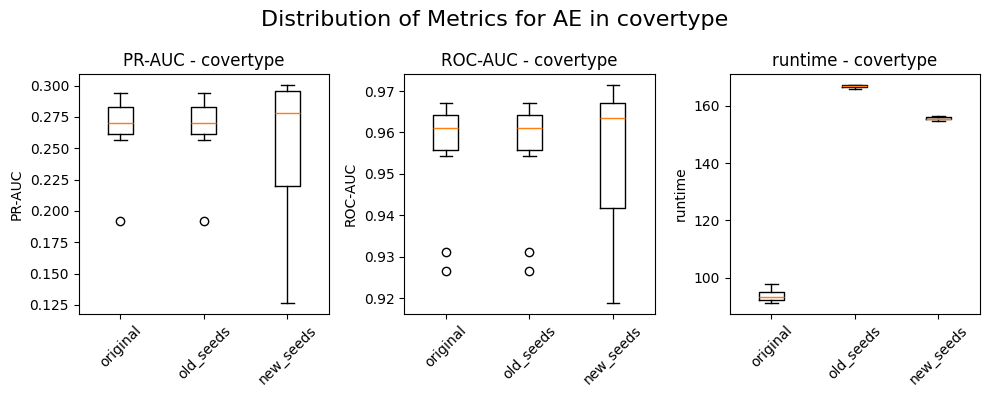

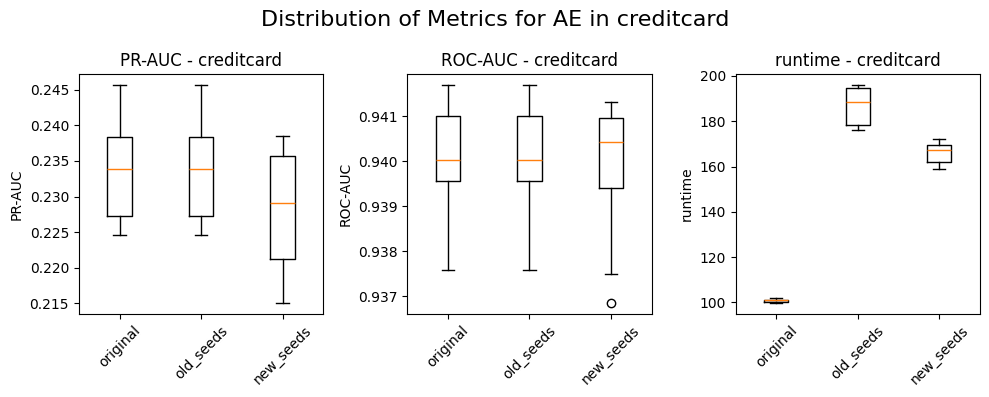

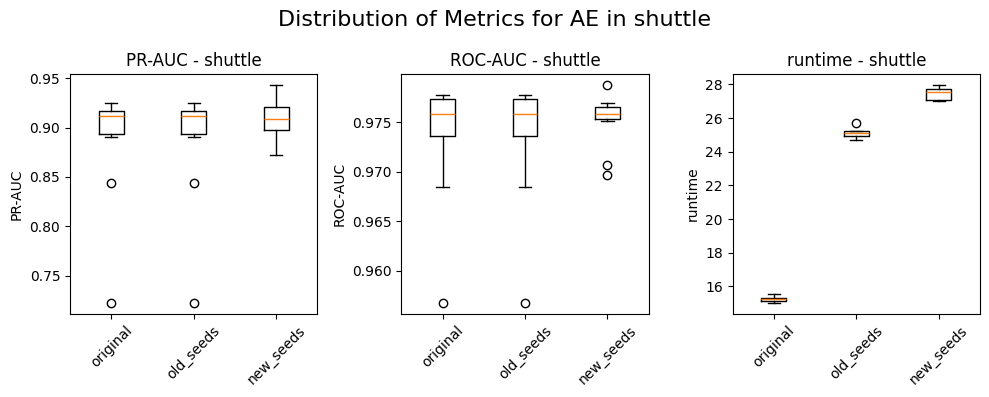

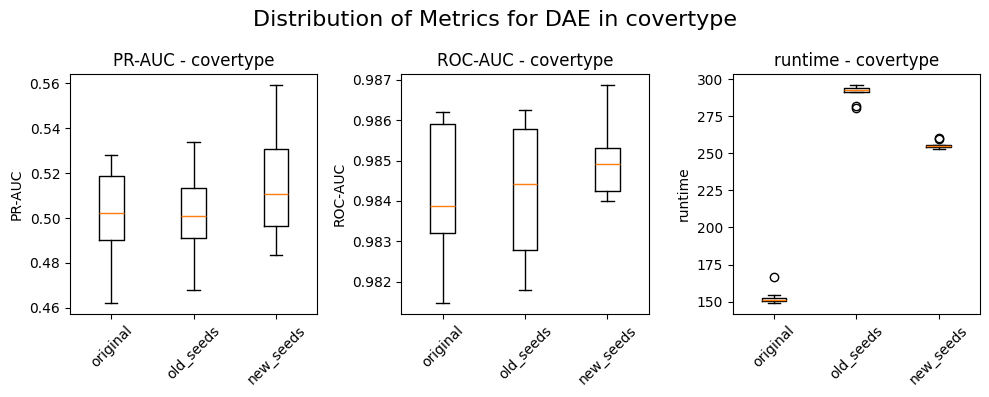

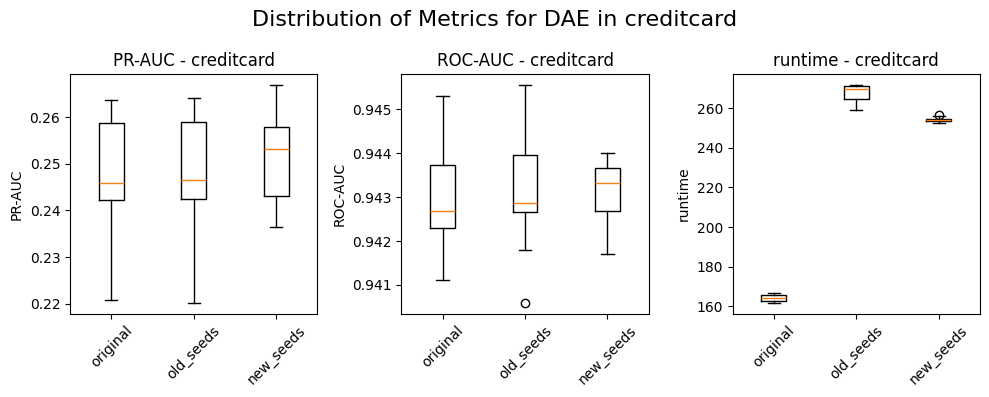

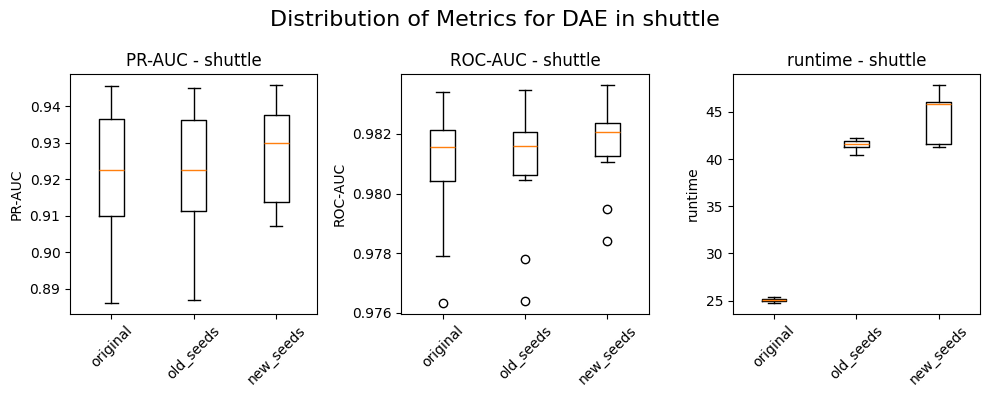

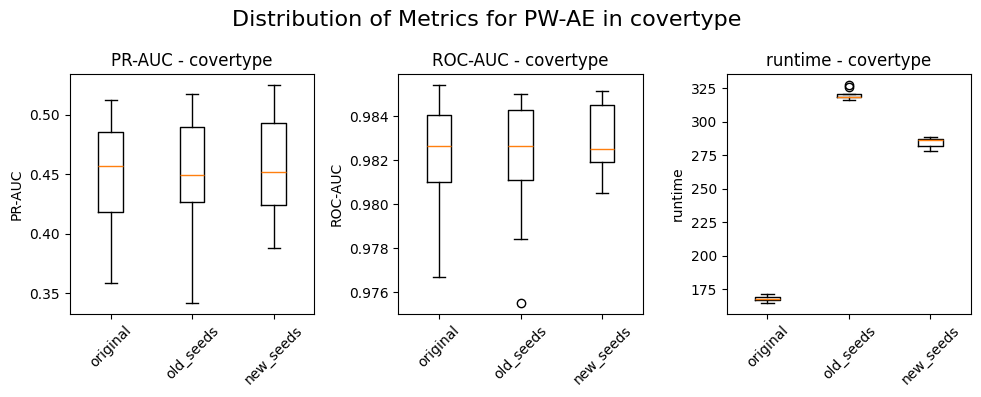

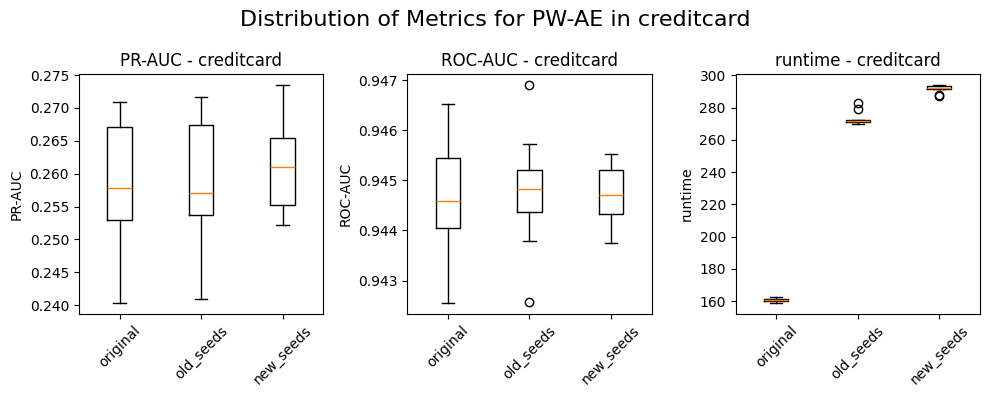

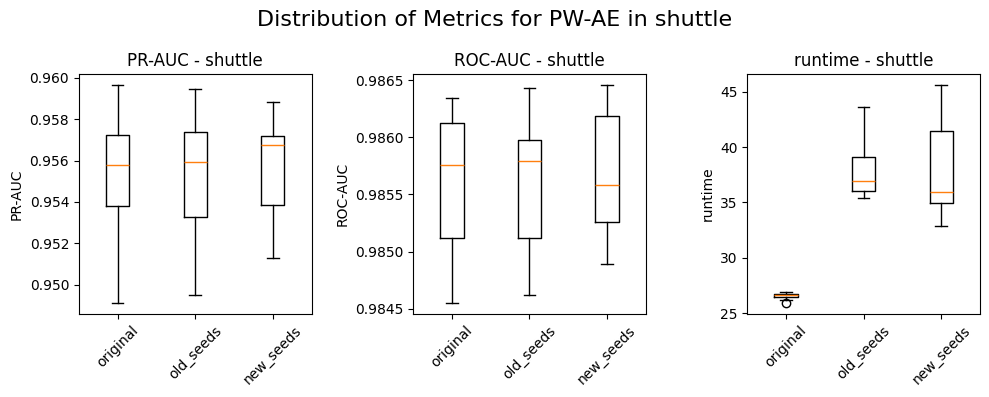

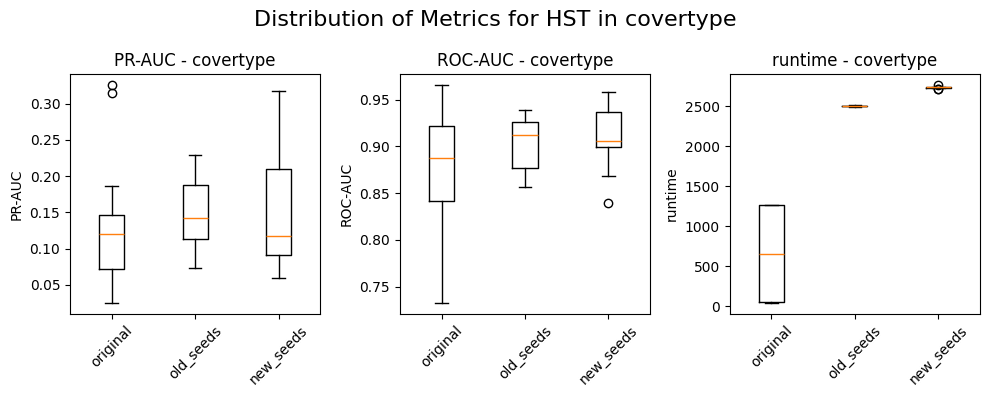

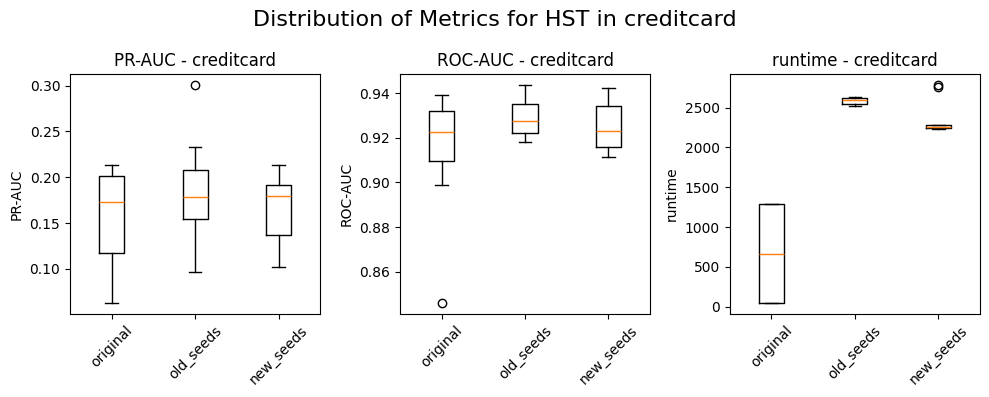

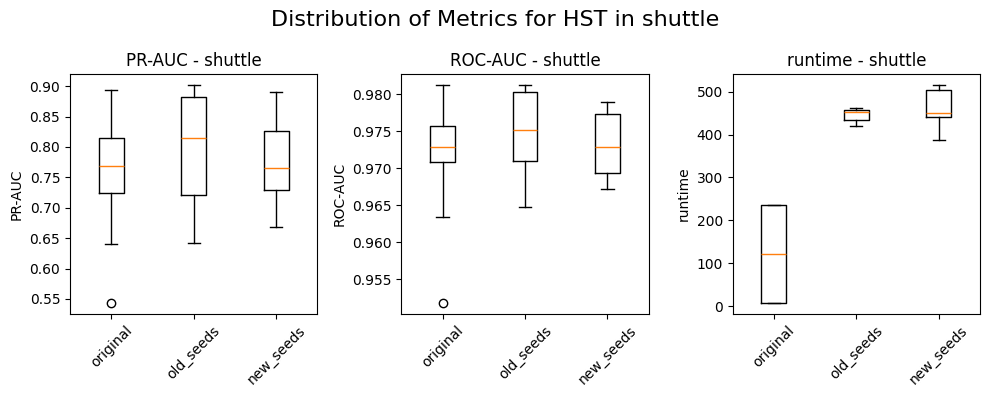

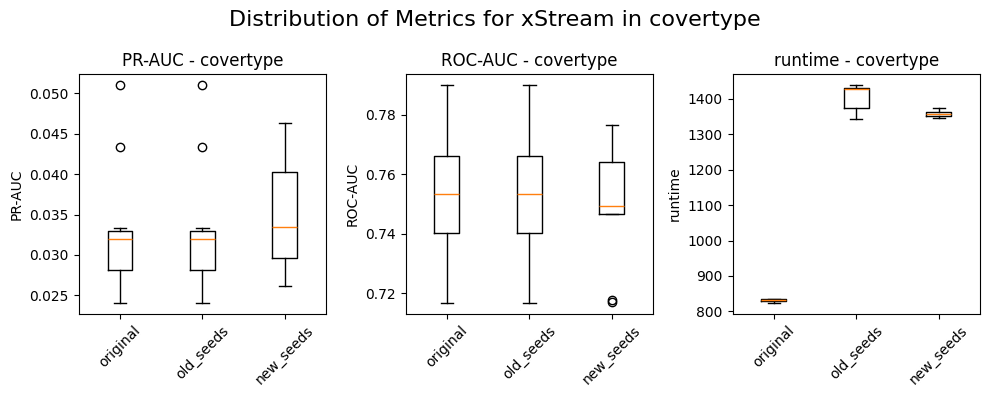

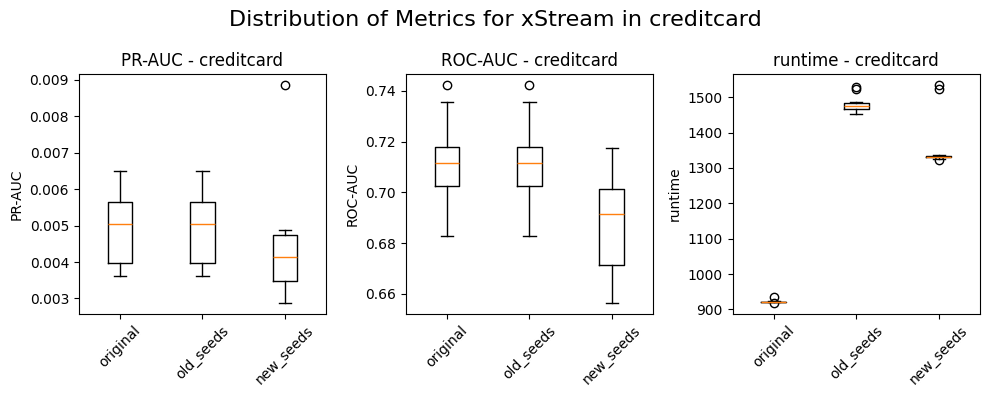

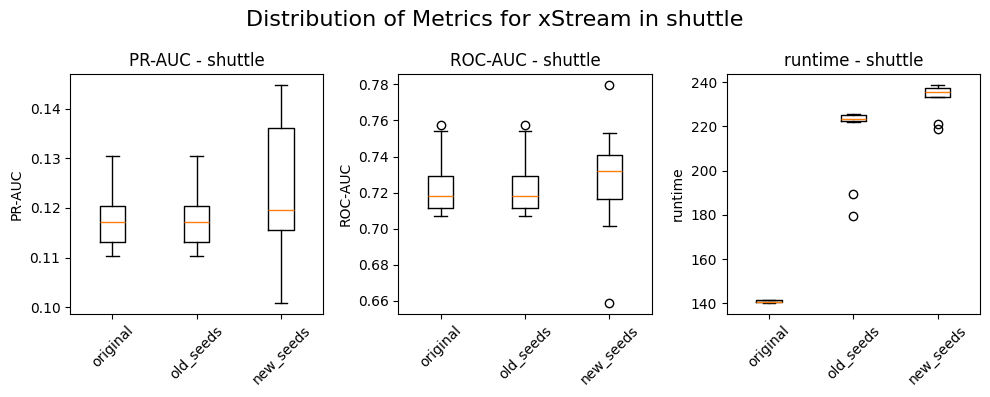

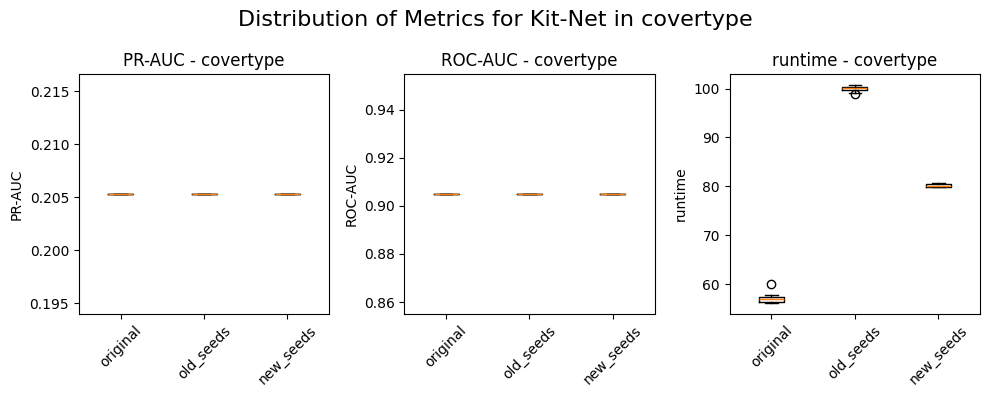

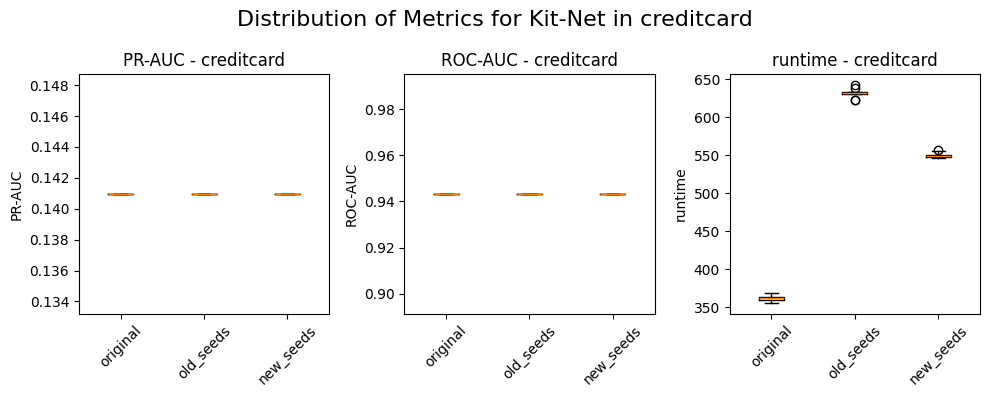

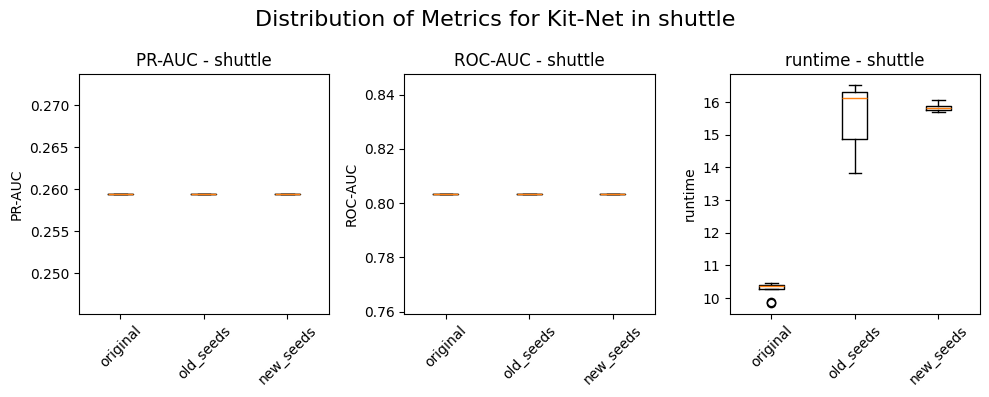

In [236]:
box_plot_seed(benchmark_results=benchmark_csv_merged, target_models=target_models, metrics=metrics)

## Future work: Do statistical tests

https://stackoverflow.com/questions/50208918/python-pandas-find-statistical-difference-between-2-distributions

In [237]:
# from scipy import stats

# merged = pd.merge(
#     df.a.value_counts().to_frame(),
#     df.b.value_counts().to_frame(),
#     left_index=True,
#     right_index=True)

# stats.ks_2samp(merged.a, merged.b)